In [46]:
import os
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedKFold, train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

from catboost import CatBoostRegressor

In [27]:
path_to_train_data = 'playground_series/s04e05_regression_with_a_flood_prediction_dataset/data/train.csv'
path_to_test_data = 'playground_series/s04e05_regression_with_a_flood_prediction_dataset/data/test.csv'

train_df = pd.read_csv(path_to_train_data, index_col='id')

def shrink_df(df, size=0.2):
    _, df_small = train_test_split(df, test_size=size)
    return df_small

train_small = shrink_df(train_df)
print(len(train_small)/len(train_df))

features = train_df.columns[:-1]
target = train_df.columns[-1]

0.20000053669327175


In [28]:
def cleaning(df):
    df['mean_feat'] = 0.1 * df[features].mean(axis=1)
    df['std_feat'] = df[features].std(axis=1)
    df['max_feat'] = df[features].max(axis=1)
    df['min_feat'] = df[features].min(axis=1)
    df['median_feat'] = 0.1 * df[features].median(axis=1)
    df = df.drop(features, axis=1)
    return df

train_df = cleaning(train_df)

X = train_df.drop(target, axis=1)
y = train_df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [41]:
regressor = CatBoostRegressor(n_estimators=1000, verbose=False)
regressor.fit(X_train, y_train, verbose=False)

print(r2_score(y_val, regressor.predict(X_val)))

0.868742159112929


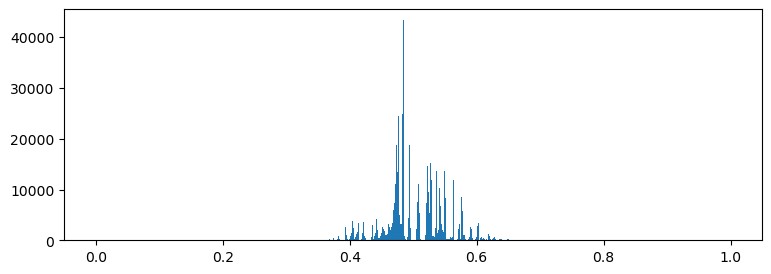

In [50]:
test_df = pd.read_csv(path_to_test_data)
test_ids = test_df['id']
test_df.drop('id', axis=1)
test_df = cleaning(test_df)

test_predictions = regressor.predict(test_df)

plt.figure(figsize=(9,3))
plt.hist(test_predictions, bins=[i*0.001 for i in range(1000)])
plt.show()

In [53]:
sub = pd.DataFrame({'id': test_ids, target: test_predictions})
sub.to_csv('submission_featEng_01.csv', index=False)